# Breast Cancer Classification Data Analysis

For this notebook, we want to predict whether the breast cancer is either malignant or benign using Machine Learning

In [1]:
#import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#defining the variable for our dataset
breast_cancer = pd.read_csv("C:\\Users\\Kevin Luu\\Downloads\\breast_cancer.csv")

In [3]:
#checking for info of the data
display(breast_cancer.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

None

In [4]:
#basic stats of the dataset
display(breast_cancer.describe())

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [5]:
#checking for any null values in the dataset
display(breast_cancer.isnull().any())

id                         False
diagnosis                  False
radius_mean                False
texture_mean               False
perimeter_mean             False
area_mean                  False
smoothness_mean            False
compactness_mean           False
concavity_mean             False
concave points_mean        False
symmetry_mean              False
fractal_dimension_mean     False
radius_se                  False
texture_se                 False
perimeter_se               False
area_se                    False
smoothness_se              False
compactness_se             False
concavity_se               False
concave points_se          False
symmetry_se                False
fractal_dimension_se       False
radius_worst               False
texture_worst              False
perimeter_worst            False
area_worst                 False
smoothness_worst           False
compactness_worst          False
concavity_worst            False
concave points_worst       False
symmetry_w

In [6]:
#Data Cleaning

#deleting the null value and id column
breast_cancer.drop(['id', 'Unnamed: 32'], axis=1, inplace=True)

In [7]:
#checking to see if the column is deleted
breast_cancer

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [8]:
breast_cancer['diagnosis'] = breast_cancer['diagnosis'].apply(lambda x: 1 if x=='M' else 0)

In [9]:
#checking to see if diagnosis in the dataset has values 0, and 1
breast_cancer

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [10]:
breast_cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    int64  
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [11]:
#checking the values in the diagnosis column in the dataset
diagnosis_count = breast_cancer['diagnosis'].value_counts()
display(diagnosis_count)

0    357
1    212
Name: diagnosis, dtype: int64

# Statistical Model Building

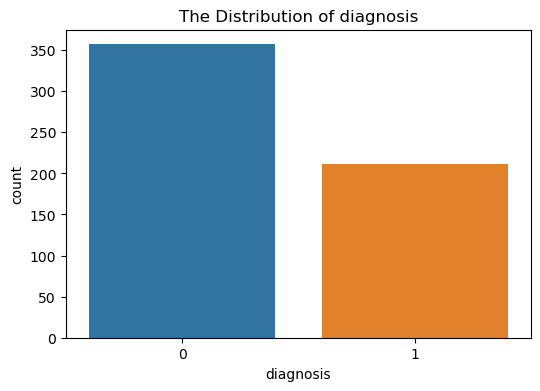

In [12]:
#plottng the distribution of the diagnosis column of the dataset
plt.figure(figsize=(6,4))
sns.countplot(data=breast_cancer, x='diagnosis')
plt.title('The Distribution of diagnosis')
plt.show()

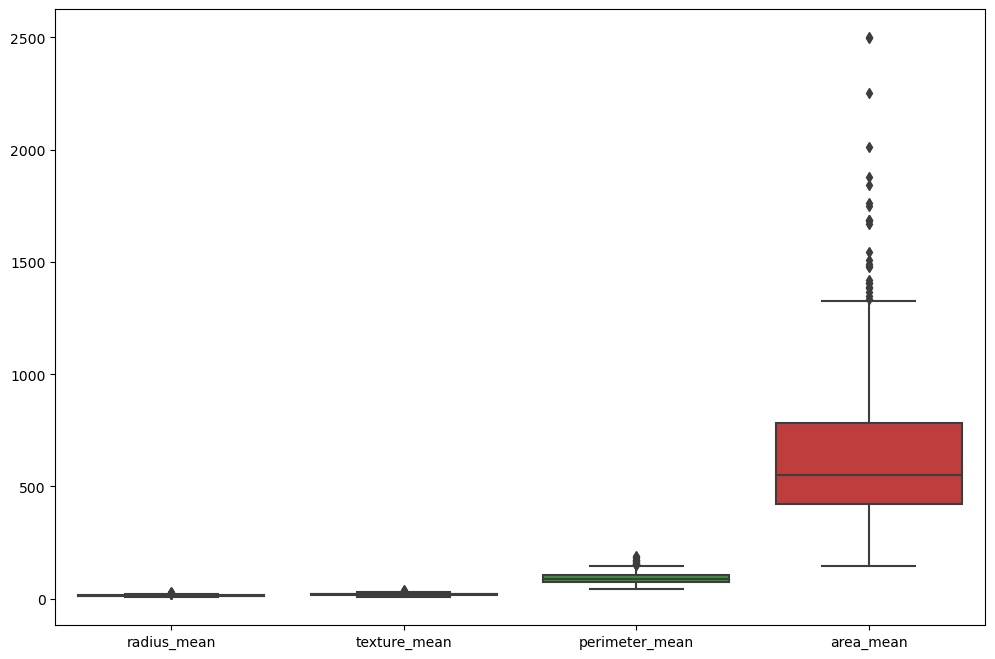

In [31]:
#Boxplot of the selected features

selected_features = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean']

plt.figure(figsize=(12,8))
sns.boxplot(data=breast_cancer[selected_features])
plt.show()

In [13]:
#Seperating the independent and dependent variables

X = breast_cancer.drop(['diagnosis'], axis=1)
Y = breast_cancer['diagnosis'] #What we are testing

In [14]:
#Performing a train test split for the independent and dependent varaible
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=10)

In [15]:
#Importing statistical packages
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.svm import SVC

In [16]:
#Logistic Regression
lr = LogisticRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

print("The accuracy score for the test set:", accuracy_score(y_test, y_pred))
print("The accuracy score for the training set:", accuracy_score(y_train, lr.predict(X_train)))

print("The confusion matrix for the test set:\n", confusion_matrix(y_test, y_pred))

print("The classification report for the test set:\n", classification_report(y_test, y_pred))

The accuracy score for the test set: 0.9298245614035088
The accuracy score for the training set: 0.945054945054945
The confusion matrix for the test set:
 [[70  5]
 [ 3 36]]
The classification report for the test set:
               precision    recall  f1-score   support

           0       0.96      0.93      0.95        75
           1       0.88      0.92      0.90        39

    accuracy                           0.93       114
   macro avg       0.92      0.93      0.92       114
weighted avg       0.93      0.93      0.93       114



C:\Users\Kevin Luu\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [17]:
#Support Vector Classifier (SVC)
svc = SVC()

parameters = {
    'gamma': [0.0001, 0.001, 0.01, 0.1],
    'C': [0.01, 0.05, 0.5, 0.1, 1, 10, 15, 20]
}

grid_search = GridSearchCV(svc, parameters)
grid_search.fit(X_train, y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.01, 0.05, 0.5, 0.1, 1, 10, 15, 20],
                         'gamma': [0.0001, 0.001, 0.01, 0.1]})

In [18]:
#Figuring out the best parameters and the score when using SVC
display(grid_search.best_params_)
display(grid_search.best_score_)

{'C': 15, 'gamma': 0.0001}

0.9472527472527472

In [19]:
#Using SVC on the train and test set
svc = SVC(C = 15, gamma = 0.0001)
svc.fit(X_train, y_train)

y_pred = svc.predict(X_test)

print("The accuracy score for the test set:", accuracy_score(y_test, y_pred))
print("The accuracy score for the training set:", accuracy_score(y_train, svc.predict(X_train)))

print("The confusion matrix for the test set:\n", confusion_matrix(y_test, y_pred))

print("The classification report for the test set:\n", classification_report(y_test, y_pred))

The accuracy score for the test set: 0.9385964912280702
The accuracy score for the training set: 0.9692307692307692
The confusion matrix for the test set:
 [[71  4]
 [ 3 36]]
The classification report for the test set:
               precision    recall  f1-score   support

           0       0.96      0.95      0.95        75
           1       0.90      0.92      0.91        39

    accuracy                           0.94       114
   macro avg       0.93      0.93      0.93       114
weighted avg       0.94      0.94      0.94       114



In [20]:
#Decision Tree Classifier
dtc = DecisionTreeClassifier()

parameters={
    'criterion': ['gini', 'entropy'],
    'max_depth': range(2,32,1),
    'min_samples_leaf': range(1,10,1),
    'min_samples_split': range(2,10,1),
    'splitter': ['best', 'random']
}

grid_search_dtc = GridSearchCV(dtc, parameters, cv=5, n_jobs=-1, verbose=1)
grid_search_dtc.fit(X_train, y_train)

Fitting 5 folds for each of 8640 candidates, totalling 43200 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 32),
                         'min_samples_leaf': range(1, 10),
                         'min_samples_split': range(2, 10),
                         'splitter': ['best', 'random']},
             verbose=1)

In [21]:
#Figuring out the best parameters and score for Decision Tree Classifier
display(grid_search_dtc.best_params_)
display(grid_search_dtc.best_score_)

{'criterion': 'entropy',
 'max_depth': 9,
 'min_samples_leaf': 1,
 'min_samples_split': 7,
 'splitter': 'random'}

0.9604395604395604

In [22]:
#Doing Decision Tree Classifier with our best parameters for the train and test set
dtc = DecisionTreeClassifier(criterion='gini', max_depth=12, min_samples_leaf=3, min_samples_split=7, splitter='random')
dtc.fit(X_train, y_train)

y_pred = dtc.predict(X_test)

print("The accuracy score for the test set:", accuracy_score(y_test, y_pred))
print("The accuracy score for the traning set:", accuracy_score(y_train, dtc.predict(X_train)))

print("The confusion matrix for the test set:\n", confusion_matrix(y_test, y_pred))

print("The classification report for the test set:\n", classification_report(y_test, y_pred))

The accuracy score for the test set: 0.9473684210526315
The accuracy score for the traning set: 0.9648351648351648
The confusion matrix for the test set:
 [[73  2]
 [ 4 35]]
The classification report for the test set:
               precision    recall  f1-score   support

           0       0.95      0.97      0.96        75
           1       0.95      0.90      0.92        39

    accuracy                           0.95       114
   macro avg       0.95      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



In [23]:
#Random Forest Classifier
rf = RandomForestClassifier(criterion='gini', max_depth=29, min_samples_leaf=3, min_samples_split=5, max_features='log2', 
                            n_estimators=130)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

print("The accuracy score for the test set:", accuracy_score(y_test, y_pred))
print("The accuracy score for the training set:", accuracy_score(y_train, rf.predict(X_train)))

print("The confusion matrix for the test set:\n", confusion_matrix(y_test, y_pred))

print("The classification report for the test test:\n", classification_report(y_test, y_pred))

The accuracy score for the test set: 0.9736842105263158
The accuracy score for the training set: 0.9868131868131869
The confusion matrix for the test set:
 [[73  2]
 [ 1 38]]
The classification report for the test test:
               precision    recall  f1-score   support

           0       0.99      0.97      0.98        75
           1       0.95      0.97      0.96        39

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



In [24]:
#AdaBoostClassifier()
ada = AdaBoostClassifier(dtc, n_estimators=190)
ada.fit(X_train, y_train)

y_pred = ada.predict(X_test)

print("The accuracy score for the test set:", accuracy_score(y_test, y_pred))
print("The accuracy score for the training set:", accuracy_score(y_train, ada.predict(X_train)))

print("The confusion matrix for the test set:\n", confusion_matrix(y_test, y_pred))

print("The classification report for the test set\n", classification_report(y_test, y_pred))

The accuracy score for the test set: 0.9736842105263158
The accuracy score for the training set: 1.0
The confusion matrix for the test set:
 [[73  2]
 [ 1 38]]
The classification report for the test set
               precision    recall  f1-score   support

           0       0.99      0.97      0.98        75
           1       0.95      0.97      0.96        39

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



In [25]:
#GradientBoostingClassifier
gbc = GradientBoostingClassifier()

parameters = {
    'loss':['deviance', 'exponential'],
    'learning_rate':[0.001, 0.1, 1, 10],
    'n_estimators':[100, 150, 180, 200]
}

grid_search_gbc = GridSearchCV(gbc, parameters, cv=5, n_jobs=-1, verbose=1)
grid_search_gbc.fit(X_train, y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


C:\Users\Kevin Luu\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
80 fits failed out of a total of 160.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
50 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Kevin Luu\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Kevin Luu\anaconda3\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\Users\Kevin Luu\anaconda3\Lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\Kevin Luu\anacond

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.001, 0.1, 1, 10],
                         'loss': ['deviance', 'exponential'],
                         'n_estimators': [100, 150, 180, 200]},
             verbose=1)

In [26]:
#figuring out the best parameter and score for the GradientBoostingClassifier
display(grid_search_gbc.best_params_)
display(grid_search_gbc.best_score_)

{'learning_rate': 1, 'loss': 'exponential', 'n_estimators': 100}

0.9670329670329672

In [27]:
#Using our printed best parameters for our train and test set
gbc = GradientBoostingClassifier(learning_rate=1, loss='exponential', n_estimators=100)
gbc.fit(X_train, y_train)

y_pred = gbc.predict(X_test)

print("The accuracy score for the test set:", accuracy_score(y_test, y_pred))
print("The accuracy score for the training set:", accuracy_score(y_train, gbc.predict(X_train)))

print("The confusion matrix for the test set:\n", confusion_matrix(y_test, y_pred))

print("The classifiction report for the test set:\n", classification_report(y_test, y_pred))

The accuracy score for the test set: 0.9649122807017544
The accuracy score for the training set: 1.0
The confusion matrix for the test set:
 [[72  3]
 [ 1 38]]
The classifiction report for the test set:
               precision    recall  f1-score   support

           0       0.99      0.96      0.97        75
           1       0.93      0.97      0.95        39

    accuracy                           0.96       114
   macro avg       0.96      0.97      0.96       114
weighted avg       0.97      0.96      0.97       114



In [28]:
#Making our prediction model

input_data = (8.196,16.84,51.71,201.9,0.086,0.05943,0.01588,0.005917,0.1769,0.06503,0.1563,0.9567,1.094,8.205,0.008968,0.01646,0.01588,0.005917,0.02574,0.002582,8.964,21.96,57.26,242.2,0.1297,0.1357,0.0688,0.02564,0.3105,0.07409)
#changing our variable into a numpy array
input_data_into_numpy_array = np.asarray(input_data)

#reshaping the numpy array as we are predicting for one datapoint
input_data_reshaped = input_data_into_numpy_array.reshape(1,-1)

#We will pick logistic regression model out of the other models for our prediction model 
prediction = lr.predict(input_data_reshaped)
print(prediction)

if (prediction[0]==1):
    print("The cancer cell is malignant.")
else:
    print("The cancer cell is benign.")

[0]
The cancer cell is benign.


C:\Users\Kevin Luu\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


**NOTE**: If we want to use KNeighborsClassifier(), we would need to scale our X_train and X_test. This would help make the shape of the dataset become equal. However, scaling the data for KNeighborsClassifier() would result in getting us the wrong prediction for our dataset. When running the prediction model after scaling, the model kept printing [1], but it should be [0] for our input data.